<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module3_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

**EUCLIDEAN DISTANCE**

In [2]:
# Simple 2D example
x1 = np.array((1, 2))
x2 = np.array((4, 6))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x1)):
  sumv += ((x1[i]-x2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [4]:
## TASK-1
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

euclidean_dist = np.sqrt(np.sum((x1-x2)**2))
print(euclidean_dist)

5.0


In [5]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x1, x2)
print(euclidean_dist)

5.0


In [6]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [7]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [8]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin',autosize=False,width=1000,height=1000,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**MANHATTAN DISTANCE**

In [9]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
manhattan_dist = distance.cityblock(x1,x2)
print(manhattan_dist)

7


In [10]:
## TASK-2
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

manhattan_dist = np.sum(np.abs(x1-x2))
print(manhattan_dist)

7


In [11]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [12]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,width=1000, height=1000,margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**MINKOWSKI DISTANCE**

In [14]:
minkowski_distance = distance.minkowski(x1, x2, p=3)
print("Minkowski distance when p=3 is: ",minkowski_distance)

Minkowski distance when p=3 is:  4.497941445275415


In [15]:
# You can verify that this distance is the same as Manhattan dist when p=1, and Euclidean dist when p=2.

minkowski_dist_p1 = distance.minkowski(x1,x2,p=1)
print("Minkowski distance when p=1 is: ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x1,x2,p=2)
print("Minkowski distance when p=2 is: ",minkowski_dist_p2)

Minkowski distance when p=1 is:  7.0
Minkowski distance when p=2 is:  5.0


**HAMMING DISTANCE**

In [17]:
str1 = 'euclidean'
str2 = 'manhattan'
hamming_dist = distance.hamming(list(str1), list(str2)) * len(str1)
print(hamming_dist)

7.0


**COSINE** **SIMILARITY**

In [19]:
from numpy.linalg import norm

cosine_similarity = 1 - distance.cosine(x1,x2)
print(cosine_similarity)

cosine_similarity = np.dot(x1,x2)/(norm(x1)*norm(x2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


**CHEBYSHEV DISTANCE**

In [21]:
chebyshev_distance = distance.chebyshev(x1,x2)
print(chebyshev_distance)

4


**JACCARD** **DISTANCE**

In [22]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [23]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is: ",jaccard_similarity(words1, words2))
print("Jaccard distance is: ", 1-jaccard_similarity(words1, words2))

Jaccard similarity is:  0.4
Jaccard distance is:  0.6


**KNN**

In [24]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

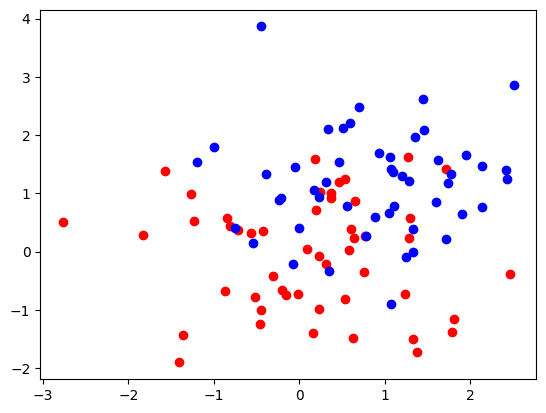

In [28]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

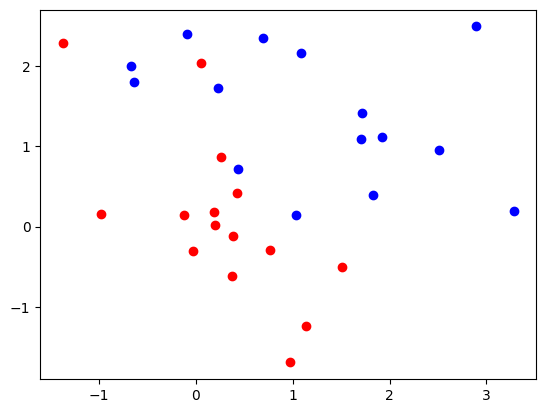

In [29]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [30]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
80.0


In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [32]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [33]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [34]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [35]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [36]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [37]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



**QUESTIONS:**

**1. How are similarity and distance different from each other?**

**Ans:**

Similarity and distance are two concepts often used in the context of data analysis, pattern recognition, and machine learning. While they are related, they represent opposite aspects of the relationship between objects or data points.

***Similarity:***

->  Similarity measures how alike two objects or data points are. The higher the similarity, the more alike the objects are considered to be.

-> Similarity is often measured on a scale from 0 to 1, where 0 indicates no similarity, and 1 indicates perfect similarity.

-> **Ex:** In the context of text analysis, similarity might measure how similar two documents are in terms of their content. Cosine similarity is a common metric used for this purpose.

***Distance:***

-> Distance, on the other hand, measures how dissimilar or far apart two objects or data points are from each other. The lower the distance, the more similar the objects are considered to be.

-> Distance is often measured on a scale from 0 to infinity, where 0 indicates perfect similarity, and higher values indicate increasing dissimilarity.

-> **Ex:** In the context of clustering, distance metrics like Euclidean distance or Manhattan distance might be used to measure how far apart two data points are in a multi-dimensional space.

**2.Are there any conditions for a particular distance to be considered a "distance metric"?**

**Ans:**

Yes, there are several conditions that a function must satisfy to be considered a "distance metric." These conditions ensure that the function measures a useful concept of distance between points.

The conditions are:

1. **Non-Negativity:** The distance between two points should always be non-negative. Mathematically, for any two points x1 and x2, the distance should be greater than or equal to zero i.e., d(x1,x2)>=0.

2. **Symmetry:** The distance from point x1 to point x2 should be the same as the distance from x2 to x1. Mathematically, for any two distinct points x1 and x2, d(x1,x2) = d(x2,x1).

3. **Triangle inequality:** The distance from one point to another through a third point should be less than or equal to the direct distance. Mathematically, for any three points x1,x2 and x3, d(x1,x2)+d(x2,x3)>=d(x1,x3).

4. **Identity:** The distance between two distinct points should be zero only if the points are the same i.e., d(x1,x2)=0 if x1=x2.